# House Price Prediction

# import relevant library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#load dataset
raw_data=pd.read_csv('House_Rent_Dataset.csv')
raw_data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# data visualization and exploration

In [3]:
raw_data.shape

(4746, 12)

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
raw_data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [6]:
raw_data.duplicated().sum()

0

In [7]:
#check mean, median, minimum and maximum house rent
print('Mean is ',round(raw_data['Rent'].mean()))
print('Median is ',round(raw_data['Rent'].median()))
print('minimum is ',round(raw_data['Rent'].min()))
print('maximum is ',round(raw_data['Rent'].max()))

Mean is  34993
Median is  16000
minimum is  1200
maximum is  3500000


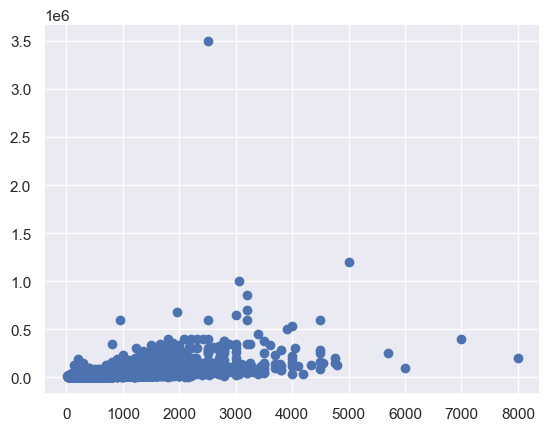

In [8]:
plt.scatter('Size','Rent',data=raw_data)

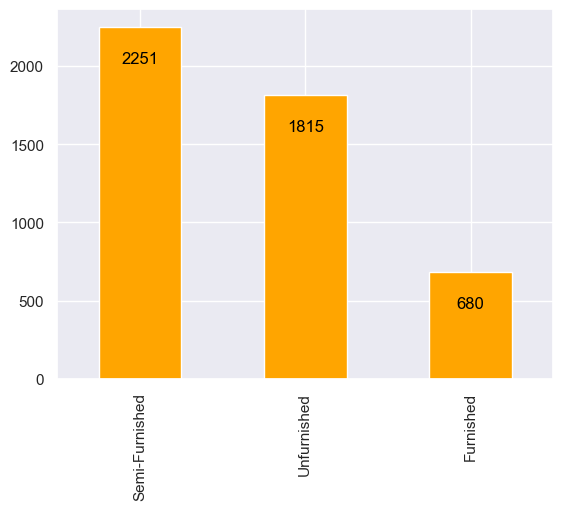

In [9]:
#plt.scatter('Furnishing Status','Rent',data=raw_data)
a=raw_data["Furnishing Status"].value_counts().plot(kind = 'bar',color = "Orange")
for p in a.patches:
    a.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()-250),ha='center',va='bottom',color='Black')

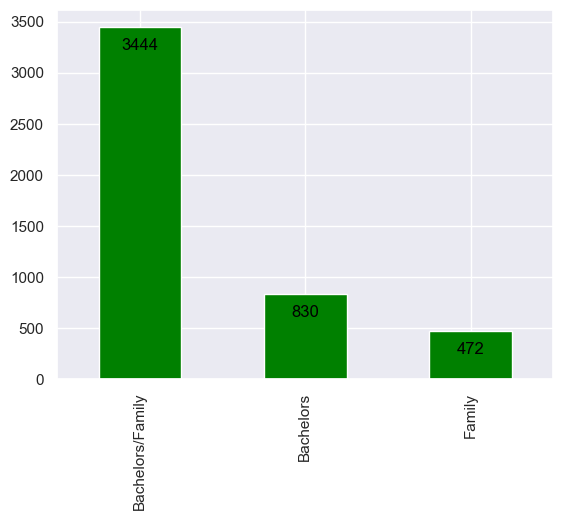

In [10]:
a=raw_data["Tenant Preferred"].value_counts().plot(kind = 'bar',color = "green")
for p in a.patches:
    a.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() - 250), ha='center',va='bottom',color='Black')

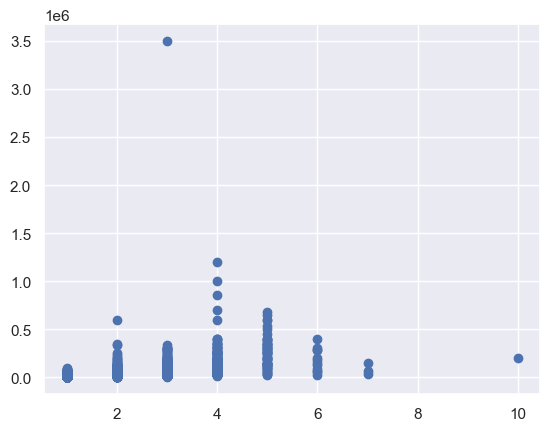

In [11]:
plt.scatter('Bathroom','Rent',data=raw_data)

In [12]:
#correlation between variables
print(raw_data['Size'].corr(raw_data['Rent']))

0.41355075822451925


In [13]:
print(raw_data['City'].unique())

['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']


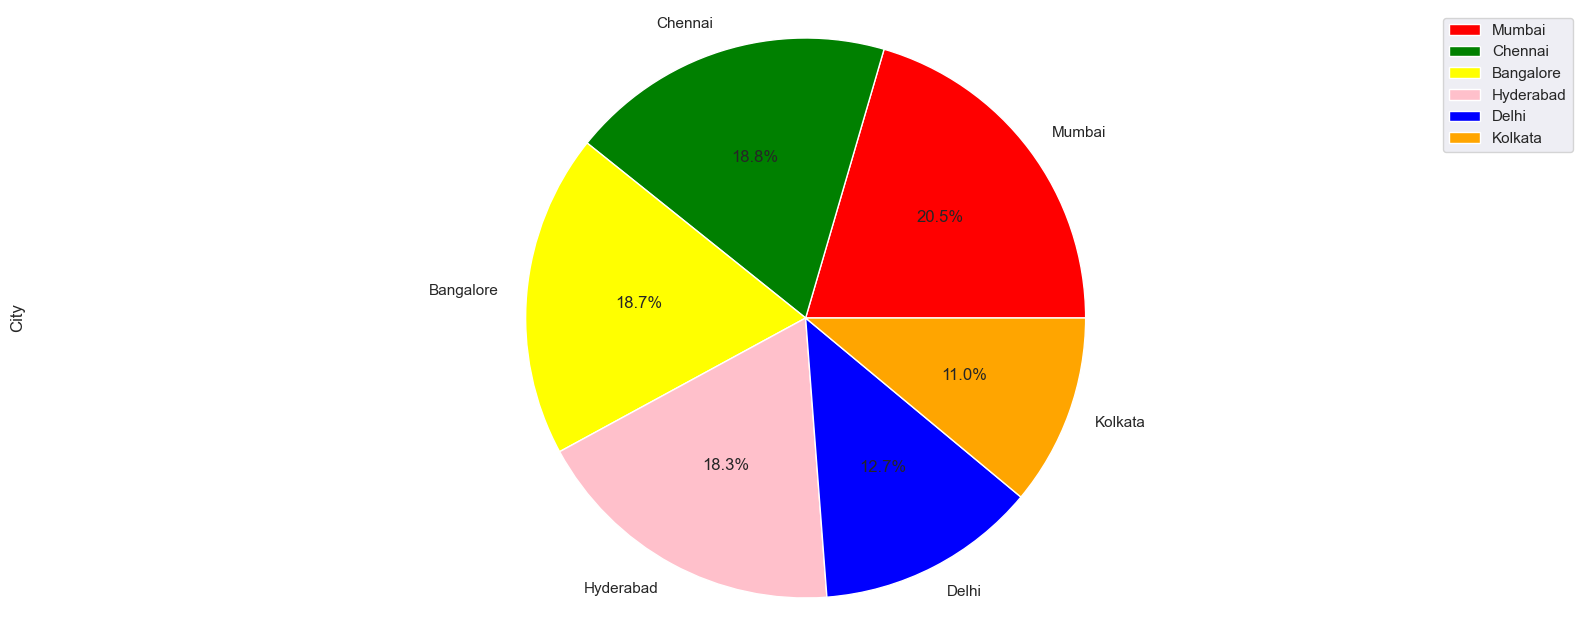

In [14]:
'''ax=None
colors=['red','green','blue','yellow','pink','orange']
for i,var in enumerate(raw_data['City'].unique()):
    df=raw_data[raw_data['City']==var]
    ax=df.plot.scatter('City','Rent',ax=ax,c=colors[i],label=var)'''
plt.figure(figsize=(20,8))
c=raw_data['City'].value_counts()
colors=['red','green','yellow','pink','blue','orange']
c.plot(kind='pie', colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels=c.index,loc='best')
plt.show()

<Axes: xlabel='City'>

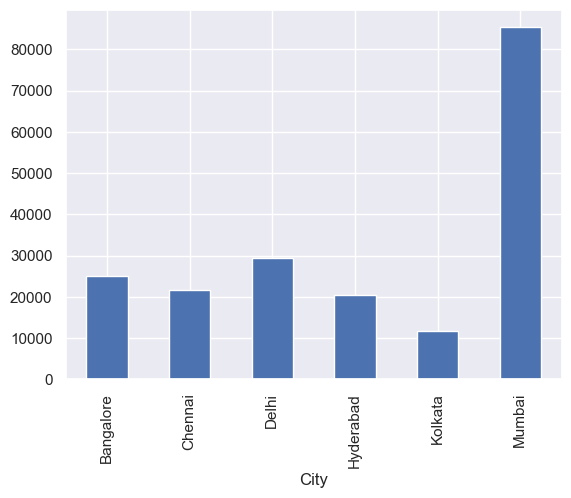

In [15]:
raw_data.groupby('City')['Rent'].mean().plot(kind='bar')

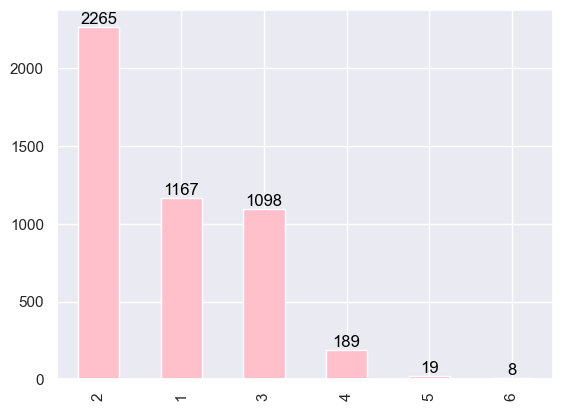

In [16]:
a=raw_data['BHK'].value_counts().plot(kind='bar',color='pink')
for p in a.patches:
    a.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center',va='bottom',color='Black')

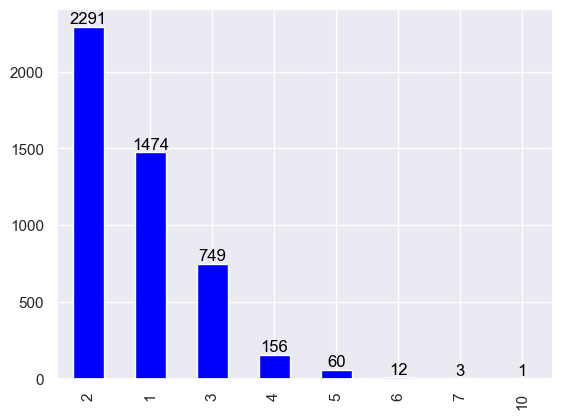

In [17]:
a=raw_data['Bathroom'].value_counts().plot(kind='bar',color='blue')
for p in a.patches:
    a.annotate(int(p.get_height()),(p.get_x()+0.25,p.get_height()+1),ha='center',va='bottom',color='Black')

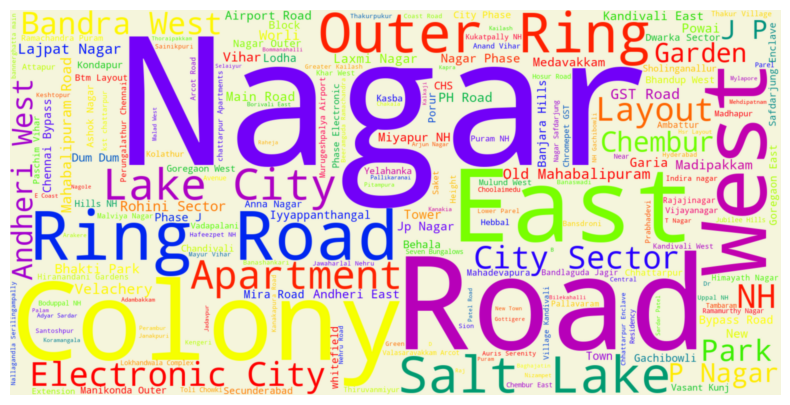

In [18]:
#wordcloud on area locality
from wordcloud import WordCloud,STOPWORDS
text=" ".join(Company for Company in raw_data['Area Locality'])
word_cloud=WordCloud(width=1600, height=800, colormap='prism', background_color='beige').generate(text)
plt.figure(figsize=(20,5))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [35]:
#the categorical features have pretty much labels, therefore using one hot encoding will likely lead to high dimensionality.
#Therefore, Scikit-learn’s label encoder was used to encode the features.
from sklearn.preprocessing import LabelEncoder
data=raw_data.copy()
le=LabelEncoder()
cat_cols=raw_data[['Floor','Area Type','Furnishing Status','Tenant Preferred','City','Area Locality','Point of Contact']]
for i in cat_cols:
    data[i]=le.fit_transform(raw_data[i])
data.sample(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
2626,2022-04-29,2,14000,100,270,2,835,2,2,1,1,2
2785,2022-04-29,3,25000,1000,16,2,567,2,2,1,2,2
3297,2022-07-08,2,35000,1020,10,1,657,1,0,1,2,2
2443,2022-06-12,2,25000,100,198,1,1076,2,2,0,2,2
4368,2022-07-10,3,95000,2700,225,1,590,3,0,0,3,0
2909,2022-06-23,3,16000,1000,16,2,531,2,2,1,2,0
1865,2022-05-14,1,5000,500,457,2,1515,0,2,1,1,2
798,2022-07-06,4,200000,1900,332,1,488,5,0,1,3,0
1028,2022-06-20,2,65000,750,196,1,606,5,0,1,2,0
728,2022-07-06,3,130000,1330,60,1,1423,5,1,1,4,0


C:\Users\KIIT\AppData\Local\Temp\ipykernel_30348\70668143.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


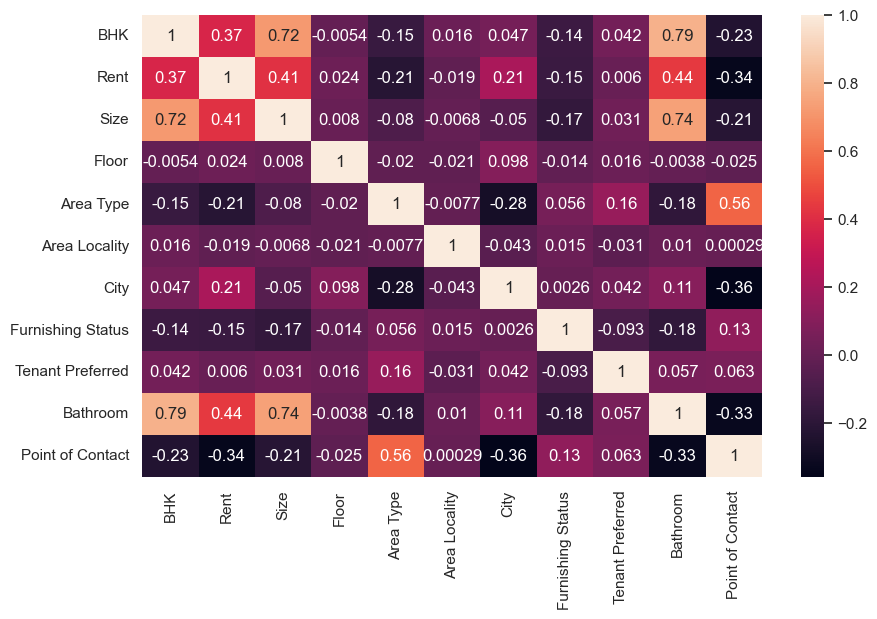

In [36]:
#visualize using heat map
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [37]:
from sklearn.metrics import mean_squared_error
def rmse(ytest, ypred):
  result = np.sqrt(mean_squared_error(ytest, ypred))
  return result
def r2score(model):
  score = model.score(rescaledX_test, y_test)
  return score

In [39]:
#train model using scikit learn using standard scaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X = data.drop(['Posted On', 'Rent'], axis=1).values
y=data['Rent'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)
lr = LinearRegression()
lr.fit(rescaledX_train, y_train)
y_pred_lr = lr.predict(rescaledX_test)
print('r2 score',r2score(lr))
print('rmse',rmse(y_test, y_pred_lr))

r2 score 0.46289289528975863
rmse 42509.70768901778


# Linear Regression 

In [41]:
# without feature scaling
X=data['Size'].to_numpy().reshape(-1,1)
y=data['Rent']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
pred=lin_reg.predict(X_test)
r2=r2_score(y_test,pred)
print('r2 score',r2)
mse=np.sqrt(mean_squared_error(y_test,pred))
print('mse',mse,mse/np.mean(pred)*100)

r2 score 0.23583226929822687
mse 50705.14362545088 143.8838225570246


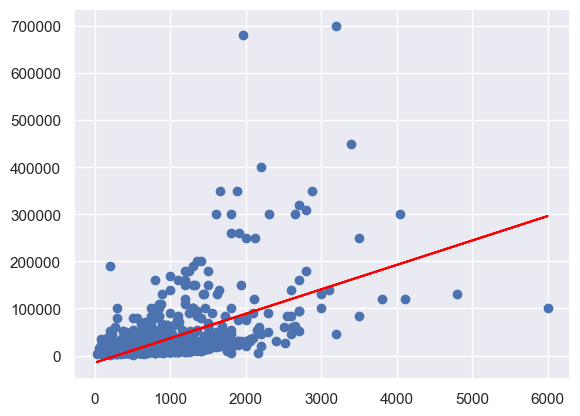

In [42]:
plt.scatter(X_test,y_test)
plt.plot(X_test,pred,color='red')
plt.show()

In [43]:
lin_reg.coef_, lin_reg.intercept_

(array([51.88308946]), -15041.531321552233)

In [44]:
lin_reg.predict([[800]])

array([26464.94024563])

# using Scikit learn

In [55]:
print(raw_data['Furnishing Status'].unique())
print(raw_data['Area Type'].unique())
df=raw_data.copy()
df['Area Type']=df['Area Type'].map({'Super Area':1, 'Carpet Area':2, 'Built Area':3})
df['City']=df['City'].map({'Mumbai':4000, 'Chennai':6000, 'Bangalore':5600, 'Hyderabad':5000, 'Delhi':1100,'Kolkata':7000})
df['Furnishing Status']=df['Furnishing Status'].map({'Unfurnished':0, 'Semi-Furnished':1,'Furnished':2})
df['Tenant Preferred']=df['Tenant Preferred'].map({'Bachelors/Family':2, 'Bachelors':1, 'Family':3})
df.head()

['Unfurnished' 'Semi-Furnished' 'Furnished']
['Super Area' 'Carpet Area' 'Built Area']


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,1,Bandel,7000,0,2,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",7000,1,2,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,7000,1,2,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,1,Dumdum Park,7000,0,2,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,2,South Dum Dum,7000,0,1,1,Contact Owner


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

X = df[['Size','Furnishing Status','City','Area Type','BHK','Bathroom','Tenant Preferred']]
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))

# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is ',score)

Mean Absolute Error: 24635.86751455445
Mean Squared Error: 2348328368.389512
Root Mean Squared Error: 48459.553943360974
Coefficients: [ 2.68083173e+01  5.23287063e+03 -4.45689088e+00  2.15416454e+04
 -1.28148055e+03  2.17640245e+04 -8.13787723e+02]
Intercept: -43874.97220162975
r2 socre is  0.41076444598401207


In [64]:
model.predict([[800,1,6000,2,3,2,2]])

C:\Users\KIIT\New folder\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37202.52973876])

# using keras 

In [60]:
X=np.array(data[["BHK", "Size", "Area Type", "City", 
                   "Furnishing Status", "Tenant Preferred", 
                   "Bathroom"]])
y = np.array(data[["Rent"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                test_size=0.20, 
                                                random_state=42)
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, 
               input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 7, 128)            66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 25)                1625      
                                                                 
 dense_7 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train,y_train,batch_size=1, epochs=21)

Epoch 1/21
3796/3796 [==============================] - 28s 6ms/step - loss: 7675464192.0000
Epoch 2/21
3796/3796 [==============================] - 23s 6ms/step - loss: 7092288000.0000
Epoch 3/21
3796/3796 [==============================] - 23s 6ms/step - loss: 6768032256.0000
Epoch 4/21
3796/3796 [==============================] - 22s 6ms/step - loss: 6575991296.0000
Epoch 5/21
3796/3796 [==============================] - 23s 6ms/step - loss: 6422766080.0000
Epoch 6/21
3796/3796 [==============================] - 22s 6ms/step - loss: 6151077376.0000
Epoch 7/21
3796/3796 [==============================] - 24s 6ms/step - loss: 6022652416.0000
Epoch 8/21
3796/3796 [==============================] - 23s 6ms/step - loss: 5950640128.0000
Epoch 9/21
3796/3796 [==============================] - 25s 7ms/step - loss: 5707043328.0000
Epoch 10/21
3796/3796 [==============================] - 24s 6ms/step - loss: 5523963904.0000
Epoch 11/21
3796/3796 [==============================] - 25s 7ms/step

In [62]:
print("Enter House Details to Predict Rent")
a = int(input("Number of BHK: "))
b = int(input("Size of the House: "))
c = int(input("Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): "))
d = int(input("Pin Code of the City: "))
e = int(input("Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): "))
f = int(input("Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): "))
g = int(input("Number of bathrooms: "))
features = np.array([[a, b, c, d, e, f, g]])
print("Predicted House Price = ", model.predict(features))

Enter House Details to Predict Rent
Number of BHK: 2
Size of the House: 800
Area Type (Super Area = 1, Carpet Area = 2, Built Area = 3): 2
Pin Code of the City: 5000
Furnishing Status of the House (Unfurnished = 0, Semi-Furnished = 1, Furnished = 2): 1
Tenant Type (Bachelors = 1, Bachelors/Family = 2, Only Family = 3): 2
Number of bathrooms: 3
1/1 [==============================] - 1s 1s/step
Predicted House Price =  [[37950.27]]
